#### Problem 3.2 For the double semi circle task in Problem 3.1 , vary sep in the range {0.2, 0.4, . . . , 5 } . Generate 2 , 000 examples and run the PLA starting with w = 0. Record the number of iterations PLA takes to converge. Plot sep versus the number of iterations taken for PLA to converge. Explain your observations. 

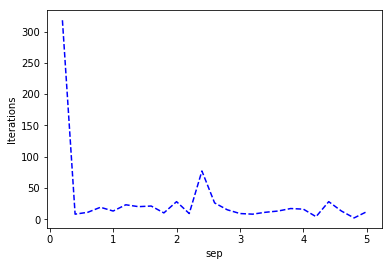

In [172]:
import numpy as np
import matplotlib.pyplot as plt

#parameters
rad = 10
thk = 5
sep= 0.2

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
  # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
    #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
       
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom 


def Perceptron(X, Y):

    weights = np.array([0,0,0])

    epoch = 200
    update = 0
    
    for k in range(epoch):
        for i, n in enumerate(X):

            predicted_y =  np.sign(np.dot(X[i] ,(np.transpose(weights))))

            actual_y = Y[i]

            if predicted_y == actual_y:
                weights = weights
            else:
                weights = weights + np.dot(X[i] , Y[i])
                update = update +1
    return update
                
   

iteration = []

while (sep <= 5.0):
    
    top,bottom = generatedata(rad,thk,sep,1000)

    X1 = [i[0] for i in top]
    Y1 = [i[1] for i in top]

    X2 = [i[0] for i in bottom]
    Y2 = [i[1] for i in bottom]


# pre-processing the data for (a)
    x1 = [[1] + i + [1] for i in top]
    x2 = [[1] + i + [-1] for i in bottom]
    data = x1 + x2

    X = []
    Y = []

    for i in range(1000):
        Y.append(data[i][3])

    for i in range(1000):
        X.append(data[i][:3])
        
    z = Perceptron(X,Y)
    
    iteration.append(z)
    
    sep = round(sep+0.2,2)

#print((iteration))
#print(len(iteration))
    
    
sep_seq = np.array([0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0])


plt.plot(sep_seq,iteration, color = 'blue',linestyle = 'dashed')
plt.xlabel('sep') 
plt.ylabel('Iterations')
plt.show()








### From the above graph we observe that sep and iteration when the sep value is less the iteration count is more.